<a href="https://colab.research.google.com/github/AbhigyanSingh97/MNIST-Digit-Prediction-Computer-Vision-/blob/master/Digit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpi
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [0]:
train = pd.read_csv('/content/drive/My Drive/data/digit-recognizer/train.csv')
test = pd.read_csv('/content/drive/My Drive/data/digit-recognizer/test.csv')

In [72]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train = train.drop('label',axis=1)
Y_train = train['label']

In [74]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [75]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

# Normalizing the data


In [0]:
X_train = X_train/255.0
test = test/255.0

In [77]:
X_train.shape

(42000, 784)

# Reshape

In [0]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# Label to one hot encoding

In [0]:
Y_train = to_categorical(Y_train,num_classes=10)

# splitting to get validation set

In [0]:
x_train,x_val,y_train,y_val = train_test_split(X_train,Y_train,test_size = 0.15,random_state=1 )

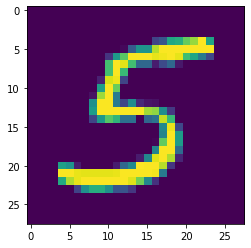

In [81]:
i = plt.imshow(x_train[0][:,:,0])

# CNN

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(filters=32,kernel_size=(5,5),strides=(2,2),padding='Same',activation='relu',input_shape = (28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same',activation='relu'))
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

Setting optimizer

In [0]:
optimizer = Adam()

In [0]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=["accuracy"])

In [0]:
lr_reduction = ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

# Data Augmentation

In [0]:
gen_data = ImageDataGenerator(rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1)

In [0]:
gen_data.fit(x_train)

In [89]:
fit_model = model.fit_generator(gen_data.flow(x_train,y_train,batch_size=60),epochs=50,validation_data=(x_val,y_val),verbose=2,steps_per_epoch=x_train.shape[0]//60,callbacks=[lr_reduction])

Epoch 1/50
 - 72s - loss: 0.6912 - accuracy: 0.7685 - val_loss: 0.0918 - val_accuracy: 0.9711
Epoch 2/50


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 71s - loss: 0.2248 - accuracy: 0.9310 - val_loss: 0.0708 - val_accuracy: 0.9779
Epoch 3/50
 - 71s - loss: 0.1623 - accuracy: 0.9525 - val_loss: 0.0529 - val_accuracy: 0.9835
Epoch 4/50
 - 74s - loss: 0.1369 - accuracy: 0.9596 - val_loss: 0.0446 - val_accuracy: 0.9868
Epoch 5/50
 - 71s - loss: 0.1246 - accuracy: 0.9630 - val_loss: 0.0422 - val_accuracy: 0.9873
Epoch 6/50
 - 71s - loss: 0.1156 - accuracy: 0.9655 - val_loss: 0.0476 - val_accuracy: 0.9865
Epoch 7/50
 - 71s - loss: 0.1090 - accuracy: 0.9678 - val_loss: 0.0366 - val_accuracy: 0.9886
Epoch 8/50
 - 71s - loss: 0.0969 - accuracy: 0.9710 - val_loss: 0.0340 - val_accuracy: 0.9897
Epoch 9/50
 - 71s - loss: 0.0967 - accuracy: 0.9712 - val_loss: 0.0381 - val_accuracy: 0.9879
Epoch 10/50
 - 71s - loss: 0.0917 - accuracy: 0.9720 - val_loss: 0.0369 - val_accuracy: 0.9890
Epoch 11/50
 - 71s - loss: 0.0860 - accuracy: 0.9747 - val_loss: 0.0385 - val_accuracy: 0.9890
Epoch 12/50
 - 74s - loss: 0.0836 - accuracy: 0.9748 - val_loss: 0.03

# Evaluating the model

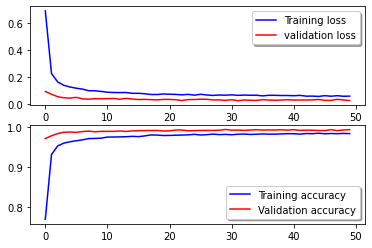

In [94]:
fig, ax = plt.subplots(2,1)
ax[0].plot(fit_model.history['loss'], color='b', label="Training loss")
ax[0].plot(fit_model.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(fit_model.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(fit_model.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [0]:
y_pred = model.predict(x_val)
y_predclasses = np.argmax(y_pred,axis =1)
y_true = np.argmax(y_val,axis=1)

In [96]:
confusion_matrix(y_true,y_predclasses)

array([[639,   0,   1,   1,   0,   1,   0,   0,   1,   0],
       [  0, 701,   0,   0,   1,   0,   0,   2,   0,   0],
       [  0,   0, 630,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   1, 639,   0,   3,   0,   1,   0,   0],
       [  0,   0,   1,   0, 617,   0,   0,   0,   0,   2],
       [  1,   0,   0,   1,   0, 562,   1,   0,   1,   0],
       [  0,   0,   0,   0,   1,   0, 610,   0,   0,   0],
       [  0,   0,   5,   0,   1,   0,   0, 628,   0,   0],
       [  1,   1,   0,   2,   0,   1,   3,   0, 614,   0],
       [  1,   0,   0,   0,   2,   1,   0,   0,   2, 618]])

In [0]:
error = (y_predclasses-y_true != 0)
y_predclasses_err = y_predclasses[error]
y_pred_err = y_pred[error]
y_true_err = y_true[error]
x_val_err = x_val[error]

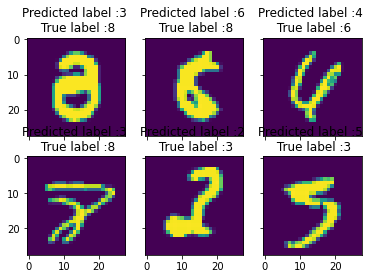

<Figure size 720x576 with 0 Axes>

In [106]:
def disp_error(errors_ind,img_err,pred_err,obs_err):
  n = 0
  nrows = 2
  ncols = 3
  fig,ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
  plt.figure(figsize=(10,8))
  for row in range(nrows):
    for col in range(ncols):
      err = errors_ind[n]
      ax[row,col].imshow((img_err[err]).reshape((28,28)))
      ax[row,col].set_title("Predicted label :{} \n True label :{}".format(pred_err[err],obs_err[err]))
      n +=1

pred_errprob = np.max(y_pred_err,axis = 1)
truepred_prob = np.diagonal(np.take(y_pred_err,y_true_err,axis =1))


pred_diff = pred_errprob - truepred_prob

err_sort = np.argsort(pred_diff)

imp_err = err_sort[-7:]

disp_error(imp_err,x_val_err,y_predclasses_err,y_true_err)

Predicting on test and exporting csv to upload on kaggle.

In [0]:
final = model.predict(test)

In [0]:
final = np.argmax(final,axis = 1)
final = pd.Series(final,name = 'Label')

In [0]:
sub = pd.concat([pd.Series(range(1,28001),name = "ImageID"),final],axis=1)

In [0]:
sub.to_csv("/content/drive/My Drive/data/digit-recognizer/digit_mnist.csv",index=False)